In [1]:
import numpy as np
from relax import Solver 

#### Значения на границе и функции, определяющие начальное приближение

In [17]:
BOUND_VAL1 = 10.0
BOUND_VAL2 = 5.0

func1 = lambda x,y: (x**2 + y**2)/BOUND_VAL1
func2 = lambda x,y: x*0+y*0

#### Инициализируется сетка и начальные значения

In [25]:
mesh = Solver.make_mesh(0.1, 10)
init1 = Solver.eval_func(func1, mesh)
init2 = Solver.eval_func(func2, mesh)
init2[75][75] = 5

#### 1. Граничные условия - 10 В на границе квадратной области

In [26]:
# Set 1st boundary values
bounds_1 = np.zeros(mesh[0].shape)
for i in xrange(len(bounds_1)):
    for j in xrange(len(bounds_1[i])):
        if i==0 or i==len(bounds_1)-1 or j==0 or j==len(bounds_1[i])-1:
            bounds_1[i][j] = BOUND_VAL1

100%|██████████| 100/100 [00:03<00:00, 28.97it/s]


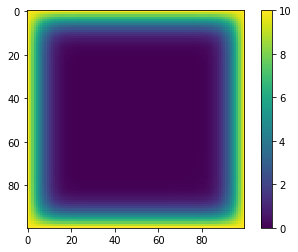

In [30]:
solver = Solver(mesh, init2, bounds_1)
results = solver.solve(100, True)

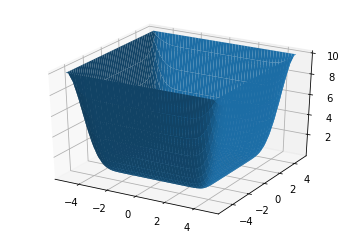

In [31]:
solver.show_values()

#### 2. Граничные условия - на границе значения 5 В, 10 В, 5 В, 10 В

In [36]:
# Set 2st boundary values
bounds_2 = np.zeros(mesh[0].shape)
for i in xrange(len(bounds_2)):
    for j in xrange(len(bounds_2[i])):
        if i==0 or i==len(bounds_2)-1:
            bounds_2[i][j] = BOUND_VAL1
        elif j==0 or j==len(bounds_2)-1:
            bounds_2[i][j] = BOUND_VAL2

100%|██████████| 100/100 [00:03<00:00, 28.07it/s]


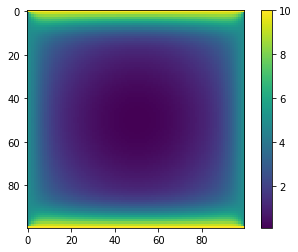

In [37]:
solver = Solver(mesh, init1, bounds_2)
results = solver.solve(100, True)

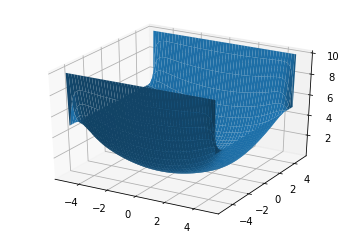

In [38]:
solver.show_values()

#### Начальный потенциал - 5 В в точке (5, 5), остальные нули

0it [00:00, ?it/s]


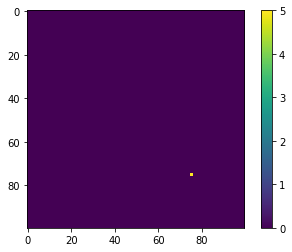

In [39]:
solver = Solver(mesh, init2, bounds_1)
results = solver.solve(0, True)

#### Решение с начальный приближением 5В в точке (5, 5)

100%|██████████| 100/100 [00:03<00:00, 26.47it/s]


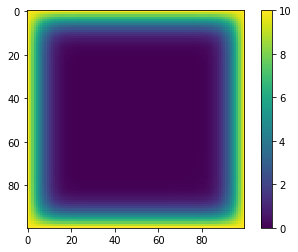

In [40]:
solver = Solver(mesh, init2, bounds_1)
results = solver.solve(100, True)

Такое начальное приближение по сути не отличается от нулевого приближения, так как уже на первой итерации, благодаря тому, что в соседних точках нули, значение в точек (5, 5) будет равно нуль